## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Loading the datasets

In [2]:
ratings_df = pd.read_csv ('538 Ratings.csv')
ratings_df

,YEAR,TEAM NO,TEAM,SEED,ROUND,POWER RATING,POWER RATING RANK
0,2023,993,Houston,1,16,93.2,13
1,2023,1011,Alabama,1,16,92.6,16
2,2023,986,Kansas,1,32,89.6,49
3,2023,963,Purdue,1,64,89.5,50
4,2023,957,Texas,2,8,90.1,43
...,...,...,...,...,...,...,...
471,2016,602,Austin Peay,16,64,68.8,462
472,2016,585,Hampton,16,64,68.6,464
473,2016,558,Southern,16,68,68.0,466
474,2016,583,Holy Cross,16,64,66.8,471


In [3]:
matchups_df = pd.read_csv ('matchups.csv')
matchups_df

,Unnamed: 0,YEAR,TEAM 1,TEAM NAME 1,SEED 1,SCORE 1,TEAM 2,TEAM NAME 2,SEED 2,CURRENT ROUND,SCORE 2
0,74,2023,1011,Alabama,1,96.0,955,Texas A&M Corpus Chris,16,64,75.0
1,75,2023,979,Maryland,8,67.0,945,West Virginia,9,64,65.0
2,76,2023,961,San Diego St.,5,63.0,1003,College of Charleston,12,64,57.0
3,77,2023,946,Virginia,4,67.0,996,Furman,13,64,68.0
4,78,2023,1001,Creighton,6,72.0,971,North Carolina St.,11,64,63.0
...,...,...,...,...,...,...,...,...,...,...,...
939,1013,2008,37,Memphis,1,85.0,15,Texas,2,8,67.0
940,1014,2008,13,UCLA,1,76.0,1,Xavier,3,8,57.0
941,1015,2008,31,North Carolina,1,66.0,43,Kansas,1,4,84.0
942,1016,2008,37,Memphis,1,78.0,13,UCLA,1,4,63.0


In [4]:
heatcheck_df = pd.read_csv('Heat Check Tournament Index.csv')
heatcheck_df

,YEAR,TEAM NO,TEAM,SEED,ROUND,POWER,PATH,DRAW,WINS,POOL VALUE,POOL S-RANK,NCAA S-RANK,VAL Z-SCORE,POWER-PATH
0,2024,1067,Connecticut,1,0,91.3,64.5,NaN,0,92.6,1,1,NaN,26.8
1,2024,1026,Stetson,16,0,47.1,91.0,NaN,0,0.5,64,62,NaN,-43.9
2,2024,1060,Florida Atlantic,8,0,69.3,73.2,NaN,0,9.0,28,31,NaN,-3.9
3,2024,1036,Northwestern,9,0,62.9,75.5,NaN,0,4.2,45,36,NaN,-12.6
4,2024,1029,San Diego St.,5,0,71.5,68.2,NaN,0,14.7,22,18,NaN,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,2013,336,VCU,5,32,70.8,73.3,-1.58,1,7.8,38,20,-1.170,-2.5
700,2013,335,Villanova,9,64,60.5,78.4,-1.20,0,3.0,52,38,-1.227,-17.9
701,2013,334,Western Kentucky,16,64,50.0,86.1,0.12,0,0.9,62,61,0.311,-36.1
702,2013,333,Wichita St.,9,4,68.7,81.1,-2.03,4,5.7,45,35,-0.553,-12.4


## Merge Datasets

In [5]:
matchups_merged = pd.merge(matchups_df, ratings_df, left_on=['TEAM NAME 1', 'YEAR'], right_on=['TEAM', 'YEAR'], suffixes = ('_1', '_2'))
matchups_merged = pd.merge(matchups_merged, ratings_df, left_on=['TEAM NAME 2', 'YEAR'], right_on=['TEAM', 'YEAR'], suffixes=('_1', '_2'))
matchups_merged

,Unnamed: 0,YEAR,TEAM 1,TEAM NAME 1,SEED 1,SCORE 1,TEAM 2,TEAM NAME 2,SEED 2,CURRENT ROUND,...,SEED_1,ROUND_1,POWER RATING_1,POWER RATING RANK_1,TEAM NO_2,TEAM_2,SEED_2,ROUND_2,POWER RATING_2,POWER RATING RANK_2
0,74,2023,1011,Alabama,1,96.0,955,Texas A&M Corpus Chris,16,64,...,1,16,92.6,16,955,Texas A&M Corpus Chris,16,64,69.9,455
1,106,2023,1011,Alabama,1,73.0,979,Maryland,8,32,...,1,16,92.6,16,979,Maryland,8,32,84.5,180
2,122,2023,1011,Alabama,1,64.0,961,San Diego St.,5,16,...,1,16,92.6,16,961,San Diego St.,5,2,86.0,136
3,75,2023,979,Maryland,8,67.0,945,West Virginia,9,64,...,8,32,84.5,180,945,West Virginia,9,64,84.2,194
4,76,2023,961,San Diego St.,5,63.0,1003,College of Charleston,12,64,...,5,2,86.0,136,1003,College of Charleston,12,64,79.8,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,482,2016,572,Michigan St.,2,81.0,571,Middle Tennessee,15,64,...,2,64,91.8,23,571,Middle Tennessee,15,32,75.0,405
427,498,2016,555,Syracuse,10,75.0,571,Middle Tennessee,15,32,...,10,4,82.7,244,571,Middle Tennessee,15,32,75.0,405
428,485,2016,539,Wichita St.,11,57.0,574,Miami FL,3,32,...,11,32,86.6,118,574,Miami FL,3,16,87.1,104
429,489,2016,569,Northern Iowa,11,88.0,552,Texas A&M,3,32,...,11,32,80.2,321,552,Texas A&M,3,16,86.8,111


In [6]:
matchups_merged = pd.merge(matchups_merged, heatcheck_df, left_on=['TEAM NAME 1', 'YEAR'], right_on=['TEAM', 'YEAR'])
matchups_merged = pd.merge(matchups_merged, heatcheck_df, left_on=['TEAM NAME 2', 'YEAR'], right_on=['TEAM', 'YEAR'])
matchups_merged

,Unnamed: 0,YEAR,TEAM 1,TEAM NAME 1,SEED 1,SCORE 1,TEAM 2,TEAM NAME 2,SEED 2,CURRENT ROUND,...,ROUND_y,POWER_y,PATH_y,DRAW_y,WINS_y,POOL VALUE_y,POOL S-RANK_y,NCAA S-RANK_y,VAL Z-SCORE_y,POWER-PATH_y
0,74,2023,1011,Alabama,1,96.0,955,Texas A&M Corpus Chris,16,64,...,64,47.5,85.0,0.40,0,0.8,63,65,-0.055,-37.5
1,106,2023,1011,Alabama,1,73.0,979,Maryland,8,32,...,32,67.6,73.1,0.31,1,10.0,32,31,-0.151,-5.5
2,122,2023,1011,Alabama,1,64.0,961,San Diego St.,5,16,...,2,70.6,67.5,1.23,5,20.9,21,17,-0.187,3.1
3,75,2023,979,Maryland,8,67.0,945,West Virginia,9,64,...,64,66.7,72.6,0.57,0,9.1,34,34,0.296,-5.9
4,76,2023,961,San Diego St.,5,63.0,1003,College of Charleston,12,64,...,64,60.9,71.1,1.29,0,6.4,41,47,0.596,-10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,480,2016,546,Utah,3,80.0,588,Fresno St.,14,64,...,64,55.7,76.1,0.55,0,2.8,51,55,0.029,-20.4
427,482,2016,572,Michigan St.,2,81.0,571,Middle Tennessee,15,64,...,32,53.6,87.5,-1.33,1,1.0,61,57,-0.749,-33.9
428,498,2016,555,Syracuse,10,75.0,571,Middle Tennessee,15,32,...,32,53.6,87.5,-1.33,1,1.0,61,57,-0.749,-33.9
429,485,2016,539,Wichita St.,11,57.0,574,Miami FL,3,32,...,16,76.5,68.0,-0.47,2,23.9,19,10,-0.874,8.5


## Inspecting Columns 

In [7]:
print (matchups_merged.columns)

Index(['Unnamed: 0', 'YEAR', 'TEAM 1', 'TEAM NAME 1', 'SEED 1', 'SCORE 1',
       'TEAM 2', 'TEAM NAME 2', 'SEED 2', 'CURRENT ROUND', 'SCORE 2',
       'TEAM NO_1', 'TEAM_1', 'SEED_1', 'ROUND_1', 'POWER RATING_1',
       'POWER RATING RANK_1', 'TEAM NO_2', 'TEAM_2', 'SEED_2', 'ROUND_2',
       'POWER RATING_2', 'POWER RATING RANK_2', 'TEAM NO_x', 'TEAM_x',
       'SEED_x', 'ROUND_x', 'POWER_x', 'PATH_x', 'DRAW_x', 'WINS_x',
       'POOL VALUE_x', 'POOL S-RANK_x', 'NCAA S-RANK_x', 'VAL Z-SCORE_x',
       'POWER-PATH_x', 'TEAM NO_y', 'TEAM_y', 'SEED_y', 'ROUND_y', 'POWER_y',
       'PATH_y', 'DRAW_y', 'WINS_y', 'POOL VALUE_y', 'POOL S-RANK_y',
       'NCAA S-RANK_y', 'VAL Z-SCORE_y', 'POWER-PATH_y'],
      dtype='object')


## Feature Engineering

### Rating Difference

In [8]:
matchups_merged ['ratings_difference'] = matchups_merged ['POWER RATING_1'] - matchups_merged ['POWER RATING_2']

### Score Difference

In [26]:
matchups_merged['score_difference'] = matchups_merged['SCORE 1'] - matchups_merged['SCORE 2']

## Inspect Key Columns

In [10]:
matchups_merged[['TEAM NAME 1', 'TEAM NAME 2', 'ratings_difference', 'score_difference']]

,TEAM NAME 1,TEAM NAME 2,ratings_difference,score_difference
0,Alabama,Texas A&M Corpus Chris,22.7,21.0
1,Alabama,Maryland,8.1,22.0
2,Alabama,San Diego St.,6.6,-7.0
3,Maryland,West Virginia,0.3,2.0
4,San Diego St.,College of Charleston,6.2,6.0
...,...,...,...,...
426,Utah,Fresno St.,10.0,11.0
427,Michigan St.,Middle Tennessee,16.8,-9.0
428,Syracuse,Middle Tennessee,7.7,25.0
429,Wichita St.,Miami FL,-0.5,-8.0


## Visualization: Ratings vs Score Difference

Text(0, 0.5, 'Score Difference')

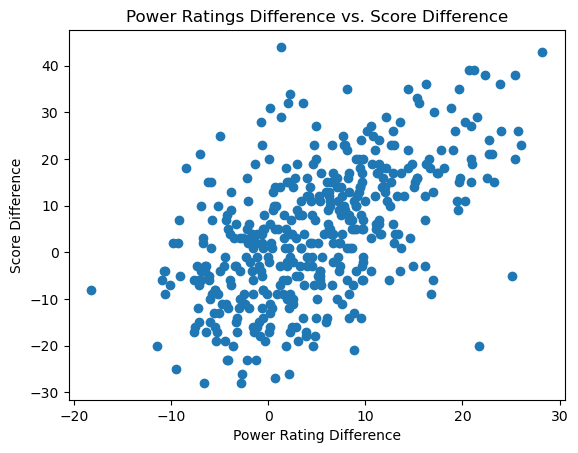

In [11]:
plt.scatter (matchups_merged['ratings_difference'], matchups_merged ['score_difference'])
plt.title ('Power Ratings Difference vs. Score Difference')
plt.xlabel ('Power Rating Difference')
plt.ylabel ('Score Difference')

## Predicted winner

In [12]:
matchups_merged['predicted_winner'] = (matchups_merged['ratings_difference'] > 0).astype(int)
matchups_merged['predicted_winner']

0      1
1      1
2      1
3      1
4      1
      ..
426    1
427    1
428    1
429    0
430    0
Name: predicted_winner, Length: 431, dtype: int64

## Actual Winner

In [13]:
matchups_merged['actual_winner'] = (matchups_merged['score_difference'] > 0).astype(int)
matchups_merged['actual_winner']

0      1
1      1
2      0
3      1
4      1
      ..
426    1
427    0
428    1
429    0
430    0
Name: actual_winner, Length: 431, dtype: int64

## Baseline Accuracy

In [14]:
accuracy = (matchups_merged['predicted_winner'] == matchups_merged['actual_winner']).astype(int).mean()
accuracy

0.7076566125290024

## Seed Difference

In [15]:
[col for col in matchups_merged.columns if 'SEED' in col]

['SEED 1', 'SEED 2', 'SEED_1', 'SEED_2', 'SEED_x', 'SEED_y']

In [16]:
matchups_merged[['TEAM NAME 1', 'SEED 1', 'TEAM NAME 2', 'SEED 2']].head()


,TEAM NAME 1,SEED 1,TEAM NAME 2,SEED 2
0,Alabama,1,Texas A&M Corpus Chris,16
1,Alabama,1,Maryland,8
2,Alabama,1,San Diego St.,5
3,Maryland,8,West Virginia,9
4,San Diego St.,5,College of Charleston,12


In [17]:
matchups_merged['seed_difference'] = matchups_merged['SEED 1'] - matchups_merged['SEED 2']
matchups_merged['seed_difference'] 

0     -15
1      -7
2      -4
3      -1
4      -7
       ..
426   -11
427   -13
428    -5
429     8
430     8
Name: seed_difference, Length: 431, dtype: int64

## Pool Value Difference

In [18]:
heatcheck_df.head()

,YEAR,TEAM NO,TEAM,SEED,ROUND,POWER,PATH,DRAW,WINS,POOL VALUE,POOL S-RANK,NCAA S-RANK,VAL Z-SCORE,POWER-PATH
0,2024,1067,Connecticut,1,0,91.3,64.5,NaN,0,92.6,1,1,NaN,26.8
1,2024,1026,Stetson,16,0,47.1,91.0,NaN,0,0.5,64,62,NaN,-43.9
2,2024,1060,Florida Atlantic,8,0,69.3,73.2,NaN,0,9.0,28,31,NaN,-3.9
3,2024,1036,Northwestern,9,0,62.9,75.5,NaN,0,4.2,45,36,NaN,-12.6
4,2024,1029,San Diego St.,5,0,71.5,68.2,NaN,0,14.7,22,18,NaN,3.3


In [19]:
matchups_merged['pool_value_difference'] = matchups_merged['POOL VALUE_x'] - matchups_merged['POOL VALUE_y']
matchups_merged['pool_value_difference']

0       73.9
1       64.7
2       53.8
3        0.9
4       14.5
       ...  
426     12.8
427    117.6
428      8.7
429     -5.5
430    -37.1
Name: pool_value_difference, Length: 431, dtype: float64

## Feature Selection for Modeling

In [20]:
add_features= ['ratings_difference', 'seed_difference', 'pool_value_difference']

## Train / Test Split by Year

In [21]:
X_train = matchups_merged[(matchups_merged['YEAR'] >= 2008) & (matchups_merged['YEAR'] <= 2021)][add_features]
y_train = matchups_merged[(matchups_merged['YEAR'] >= 2008) & (matchups_merged['YEAR'] <= 2021)]['actual_winner']

X_test = matchups_merged[(matchups_merged['YEAR'] >= 2022) & (matchups_merged['YEAR'] <= 2023)][add_features]
y_test = matchups_merged[(matchups_merged['YEAR'] >= 2022) & (matchups_merged['YEAR'] <= 2023)]['actual_winner']


## Logistic Regression Model

In [22]:
model = LogisticRegression()
model.fit (X_train, y_train)

LogisticRegression()

## Predictions

In [23]:
y_hat = model.predict (X_test)

## Model Accuracy

In [24]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_hat)

In [25]:
train_accuracy, test_accuracy

(0.7249190938511327, 0.6311475409836066)

## Feature Rationale

- Ratings Difference: Represents the strength gap between the two teams. The higher power ratings generally indicate better overall performance, so this feature helps show which team is stronger entering the matchup
- Seed Difference: Tournaments seeds reflect the quality of the team. The lower the seed like 1,2,3 are typically the stronger teams, so the difference in the seeds helps measure the expected advantage.
- Pool Value Difference: Represents how even matched the teams are in bracket pools. Smaller differences often indicate closer matchups, while larger differences can show clearer favorites.

## Conclusion 
This project explored whether team strength indicators—specifically **power rating difference**, **seed difference**, and **pool value difference**—can help predict the outcomes of NCAA March Madness matchups. After merging historical game data with FiveThirtyEight ratings and HeatCheck analytics, features were engineered to represent team quality, expected performance, and matchup balance. Using these features, a **Logistic Regression** model was trained to predict which team would win a given matchup.

### **Model Performance**

* **Training Accuracy:** 72%
* **Testing Accuracy:** 63%

The model successfully identified meaningful patterns within the data, though the inherent volatility of March Madness—especially in later rounds—naturally limits predictive accuracy.

### **What Worked Well**

* **Power Rating Difference** showed a strong relationship with actual score outcomes.
* **Seed Difference** effectively captured expected tournament strength.
* **Pool Value Difference** contributed additional context about matchup balance and bracket expectations.

### **Limitations**

* The model uses only three features, so performance is intentionally focused and interpretable.
* The analysis does not incorporate more advanced metrics such as efficiency ratings, player statistics, or long-term performance trends.
* The NCAA tournament contains frequent upsets, which limits any model’s predictive ceiling.

### **Takeaway**

The results show that even a streamlined feature set can uncover real predictive signals in tournament matchups. This project demonstrates applied data cleaning, feature engineering, exploratory analysis, and predictive modeling within a complex sports analytics context.


